## Introduction

## Business Understanding
The goal of this notebook is to analyze box office movies dataset and generate findings that Microsoft would rely on to start their new movie studio

In [1]:
#import necessary packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#loading data from the first dataset(movie budgets datasets)
df1=pd.read_csv('tn.movie_budgets.csv',parse_dates=['release_date'])
df1.head(2)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,2009-12-18,Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"


In [3]:
#loading the second dataset(tmdb movies)
df3=pd.read_csv('tmdb.movies.csv',parse_dates=['release_date'])
df3.head(2)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [4]:
#merging the two datasets into one
df = pd.merge(df1, df3, how="right",on="id")

df.head(2)

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,Unnamed: 0,genre_ids,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count
0,12444,NaT,NaN,NaN,NaN,NaN,0,"[12, 14, 10751]",en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,10191,NaT,NaN,NaN,NaN,NaN,1,"[14, 12, 16, 10751]",en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610


In [5]:
#checking the number of rows and columns the merged dataset has
df.shape

(26855, 15)

In [6]:
#checking columns with null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26855 entries, 0 to 26854
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 26855 non-null  int64         
 1   release_date_x     344 non-null    datetime64[ns]
 2   movie              344 non-null    object        
 3   production_budget  344 non-null    object        
 4   domestic_gross     344 non-null    object        
 5   worldwide_gross    344 non-null    object        
 6   Unnamed: 0         26855 non-null  int64         
 7   genre_ids          26855 non-null  object        
 8   original_language  26855 non-null  object        
 9   original_title     26855 non-null  object        
 10  popularity         26855 non-null  float64       
 11  release_date_y     26855 non-null  datetime64[ns]
 12  title              26855 non-null  object        
 13  vote_average       26855 non-null  float64       
 14  vote_c

In [7]:
#checking the datatypes of the columns
df.dtypes

id                            int64
release_date_x       datetime64[ns]
movie                        object
production_budget            object
domestic_gross               object
worldwide_gross              object
Unnamed: 0                    int64
genre_ids                    object
original_language            object
original_title               object
popularity                  float64
release_date_y       datetime64[ns]
title                        object
vote_average                float64
vote_count                    int64
dtype: object

In [8]:
#dropping unneccessary columns
df.drop(['Unnamed: 0','genre_ids'],axis=1,inplace=True)

In [9]:
#converting production_budget,worldwide_gross,domestic_gross columns into float data types
df['production_budget'] = df['production_budget'].str.replace('$', '').str.replace(',', '').astype(float)
df['worldwide_gross'] = df['worldwide_gross'].str.replace('$', '').str.replace(',', '').astype(float)
df['domestic_gross'] = df['domestic_gross'].str.replace('$', '').str.replace(',', '').astype(float)

In [10]:
#filling null values of the production_budget  with mean
df['production_budget']=df['production_budget'].fillna(df['production_budget'].mean())

In [11]:
#checking the columns after data cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26855 entries, 0 to 26854
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 26855 non-null  int64         
 1   release_date_x     344 non-null    datetime64[ns]
 2   movie              344 non-null    object        
 3   production_budget  26855 non-null  float64       
 4   domestic_gross     344 non-null    float64       
 5   worldwide_gross    344 non-null    float64       
 6   original_language  26855 non-null  object        
 7   original_title     26855 non-null  object        
 8   popularity         26855 non-null  float64       
 9   release_date_y     26855 non-null  datetime64[ns]
 10  title              26855 non-null  object        
 11  vote_average       26855 non-null  float64       
 12  vote_count         26855 non-null  int64         
dtypes: datetime64[ns](2), float64(5), int64(2), object(4)
memory 

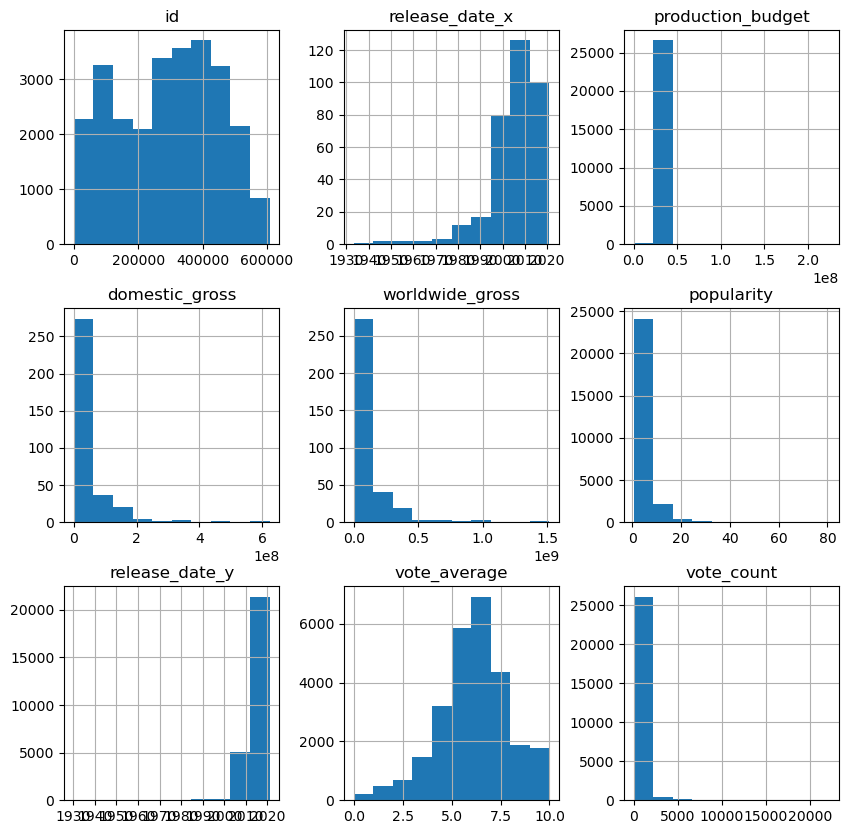

In [12]:
#visualizing distributions of various features in the dataset
df.hist(figsize=(10,10));

In [13]:
#getting the overall dataset statistical summary
df.describe()

,id,release_date_x,production_budget,domestic_gross,worldwide_gross,popularity,release_date_y,vote_average,vote_count
count,26855.000000,344,2.685500e+04,3.440000e+02,3.440000e+02,26855.000000,26855,26855.000000,26855.000000
mean,291337.590281,2005-03-13 23:09:46.046511616,3.056248e+07,4.445669e+07,9.801479e+07,3.279934,2014-01-16 23:29:58.324334592,6.002268,220.280283
min,27.000000,1933-04-07 00:00:00,1.500000e+04,0.000000e+00,0.000000e+00,0.600000,1930-04-29 00:00:00,0.000000,1.000000
25%,150124.500000,2000-10-09 12:00:00,3.056248e+07,3.470416e+06,8.182682e+06,0.600000,2012-05-25 00:00:00,5.000000,2.000000
50%,306456.000000,2007-11-08 00:00:00,3.056248e+07,1.972829e+07,2.774548e+07,1.400000,2014-08-26 00:00:00,6.000000,5.000000
75%,418421.000000,2013-07-03 06:00:00,3.056248e+07,5.229338e+07,1.066868e+08,3.983000,2016-09-23 00:00:00,7.000000,30.000000
max,608444.000000,2020-12-31 00:00:00,2.250000e+08,6.232795e+08,1.517936e+09,80.773000,2020-12-25 00:00:00,10.000000,22186.000000
std,156192.388466,NaN,4.333933e+06,7.001479e+07,1.731311e+08,4.551016,NaN,1.847470,1010.271443


## Research Question 1 (Do movies with high vote_average have high popularity)

In [14]:
#getting median vote_average
def medianfunction(columnname):
    return df[columnname].median()

In [15]:
#calling median Function
medianfunction('vote_average')

6.0

In [16]:
# Selecting each movie group and getting its mean popularity
lowvote=df.query('vote_average < {}'.format(medianfunction('vote_average')))
highvote=df.query('vote_average >= {}'.format(medianfunction('vote_average')))
lowvotegenre_popularity_mean=lowvote['popularity'].mean()
highvotegenre_popularity_mean=highvote['popularity'].mean()

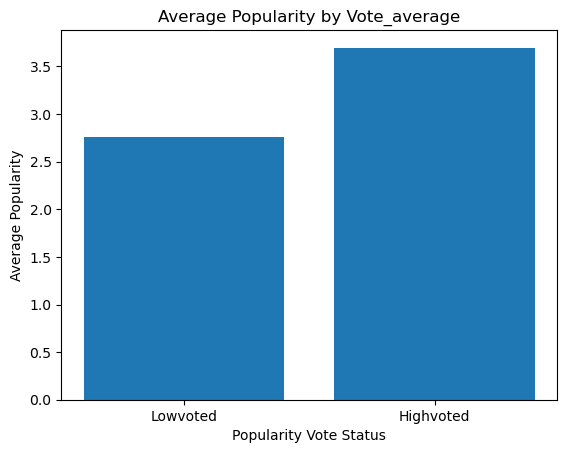

In [17]:
# Create bar chart visualization
values = [1, 2]
lengths = [lowvotegenre_popularity_mean, highvotegenre_popularity_mean]
labels = ['Lowvoted', 'Highvoted']
plt.bar(values, lengths, tick_label=labels)
plt.title('Average Popularity by Vote_average')
plt.xlabel('Popularity Vote Status')
plt.ylabel('Average Popularity');

## Research Question One Findings
It appears movies with low vote_average are less popular than those with high vote_average.Vote_average determines the popularity of a movie

## Research Question 2: How did film budgets change from each decade on average?

In [18]:
#create decade column to the movies df 
df['release_year'] = df['release_date_x'].dt.year
#create bins and defining exact edges 


# Extract the year

edges = [1959, 1970, 1980, 1990, 2000, 2010, 2016]

#values that fall within the edges will be placed under these names accordingly 
names = ['1960', '1970', '1980', '1990', '2000', '2010']

#use pd.cut to categorize bin values into discrete intervals 
#bins are constant size 
#values from release_year are 1-dimensional 
#labels set lists of values correspond to how the age values will be put in bins by decades
df['decade'] = pd.cut(df['release_year'], edges, labels=names)
df.head()

,id,release_date_x,movie,production_budget,domestic_gross,worldwide_gross,original_language,original_title,popularity,release_date_y,title,vote_average,vote_count,release_year,decade
0,12444,NaT,NaN,3.056248e+07,NaN,NaN,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,NaN,NaN
1,10191,NaT,NaN,3.056248e+07,NaN,NaN,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,NaN,NaN
2,10138,NaT,NaN,3.056248e+07,NaN,NaN,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,NaN,NaN
3,862,NaT,NaN,3.056248e+07,NaN,NaN,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,NaN,NaN
4,27205,NaT,NaN,3.056248e+07,NaN,NaN,en,Inception,27.920,2010-07-16,Inception,8.3,22186,NaN,NaN


In [20]:
#Grouping the 
budget=df.groupby('decade')['production_budget'].mean().reset_index(name='production_budget')
budget

C:\Users\petra.kibugu\AppData\Local\Temp\ipykernel_42616\1859693883.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  budget=df.groupby('decade')['production_budget'].mean().reset_index(name='production_budget')


,decade,production_budget
0,1960,4.728667e+06
1,1970,1.363750e+07
2,1980,1.772000e+07
3,1990,2.982851e+07
4,2000,2.777293e+07
5,2010,3.717830e+07
